# **Loan Prediciton Model** #

---



### **Group 13:** ### 


* Andersen, Sebastian (261069597) 

* Khoury, Mariam (261025771) 
* Mehra, Aryaan (260967233) 
* Van Loan, Jonathan (260981768)




## **Introduction** ##

## *Motivation:* ##

Banks play a major role in ensuring the financial stability of a country and driving its growth by managing deposits and loans. Effective lending is crucial to fuel economic activity, but also to avoid risks that can destabilize the financial system. The most recent example of lending gone-wrong is the 2008 crisis.  That crisis, caused by loans extended to non-creditworthy applicants, serves as a reminder of the consequences of poor lending practices. The wave of defaults triggered by excessive risk-taking led to a global recession, leaving a long-lasting impact on economies worldwide. 

While the case of the 2008 crisis exposed the dangers of excessive risk-taking by banks, it highlights the importance of automated lending systems  that eliminate human error and risky decision-making. 


## *The Business Problem* ##

Today, most loan applications are still reviewed manually, which not only increases not only the potential for human error, but also that  for bias and discrimination when assessing the eligibility of an applicant. Furthermore, the process is time-consuming. The time required to review loan applications is operationally expensive, requiring more workforce and resources. In an  era of Fintech and digital banking, such delays don’t only increase operational expenses, but also often lead to customer dissatisfaction. Providing a fast, smooth, and efficient loan application process has therefore  become a critical factor in retaining customer loyalty and ensuring a competitive edge in the banking industry. 
To address these challenges, there is an urgent need to innovate and streamline the process by which loan applications are reviewed. This is where machine-learning comes into play, offering the potential to develop a model, which can automatically determine the eligibility of an applicant.


## *The Machine Learning Problem* ##

To overcome these limitations, we propose developing a supervised Machine Learning classification model that automates the loan approval process. This ML model will:
Identify creditworthy customers versus non-creditworthy ones based on historical data and various applicant factors and predict an applicant’s ability to repay loans, enhancing decision accuracy.
By training on historical loan data, the model will learn patterns and relationships between applicant characteristics and their eligibility. This ensures consistent and unbiased decision-making and reduces default risks. 


## **Model Development**

## *Data Description* ##

Our dataset was obtained from Kaggle - a publicly accessible repository. It  contains 4,270 rows and 13 columns, representing details of loan applications. Each row corresponds to a unique loan application, capturing essential information about the applicant and their financial situation. The data includes both categorical (employment status and educational background)  and numerical variables (annual income, duration of loan term, assets value etc..). We picked the features that seemed the  most relevant for our model. We combined the four different types of assets, namely commercial, luxury, residential and bank assets into one feature which we named total asset. The other features we selected were loan term, number of dependents, cibil score and loan amount and income-which we transformed into a ratio of debt-to-income to capture the relation between both features. The Cibil-score is a 3-digit credit score weighted off of several factors including repayment history, and various details concerning an applicant’s credit history. It is a unique score for each applicant and is expected to be the largest contributor to the outcome of the decision of the loan. Across the entire dataset, there were roughly twice as many loan approvals as there were rejections. While the dataset was imbalance, we did not deem it severe enough to necessitate balance techniques such as SMOTE() or regularization, but rather we took this imbalance into consideration when evaluating the model performance. 


## *Evaluation metrics* ##

Given the imbalanced nature of the data, accuracy did not seem like an appropriate metric for our model. 

The choice between optimizing precision and recall is difficult. In the context of bank lending, optimizing precision at the price of recall would lead to fewer unqualified applicants being approved. When in doubt, the model would reject the application. However, if the model is too stringent, it could reject more applicants than it should, which would be costly for the banks as loans are the banks’ main source of revenue. High recall on the other hand would lead to fewer qualified applicants mistakenly rejected. Optimizing this metric at the cost of precision would lead to higher risk of default on the loans since the model risks accepting more loans than it should. Default on loans is a huge expense for banks. 
Therefore, to manage both costs, we decided to optimize the F1 score, which comprises both metrics and allows us to balance the benefits and costs of each. 


## *Data Cleaning and Preprocessing*

We started by loading and inspecting the dataset to ensure the data’s integrity. We made sure to check and remove missing values, incorrect data types, and duplicates and confirmed that our dataset was complete. One of our first steps involved removing trailing spaces from column names and labels. Next, we created new features to make sure that there was no collinearity and to enhance the predictive power of the model. We calculated the debt to income ratio and we also added all asset values to one single “total_assets” to further simplify. Then we separated the features and the dependent variable, “loan status" which we encoded into binary variables using a label encoder. To prepare the data for the machine learning models, we divided the features into numerical and categorical groups. For the numerical features such a cibil_score and loan_term we used StandardScaler to standardize them. For the categorical features like education and self_employed we used one-hot encoding to ensure that they could be effectively used by our models. These steps were combined into a ColumnTransformer which made a unified and reusable pipeline. Finally we split the data into training and test sets, making it an 80-20 split to preserve data for an unbiased evaluation.

## *Exploratory Data Analysis*

To better understand the relationship between the features, we computed a correlation matrix for the numerical variables. This visualization helped us identify if we had any multicollinearity that could have affected our model. Later, we calculated the Variance Inflation Factor for the numerical features to quantify the multicollinearity as well. All values showed relatively acceptable levels of multicollinearity

## *Model Selection and Baseline Performance*

We started by testing four different machine learning models: KNN, Logistic Regression, Random Forest (RF) and a Neural Network (NN). Each model was evaluated using the default parameters with 5 fold cross validation with the F1 score as our primary metric. The Random Forest performed the best followed by the Neural Network.

## *Hyperparameter Optimization*

Because of these results, we focused on optimizing RF and NN. For the RF we used RandomizedSearchedCV to tune the hyperparameter such as the number of trees, max depth and minimum sample requirements for splitting and leaf nodes. This helped us explore many different hyperparameters while balancing the computational cost. For the NN, we optimized hyperparameters such as the network architecture, activation functions, regularization strength and learning rate strategies.

## *Model Evaluation and Testing*

After optimization we evaluated the models using cross-validation. The fine-tuned RF consistently got an F1 score of 1.00 which outperformed the NN which got an F1 score of 0.98. To ensure the models generalized well, we tested the best RF model on an unseen test set. 
To make our RF interpretable, we got and ranked the importance of features based on how important they were to the predictions. 


## **Results**

The evaluation focused primarily on the Random Forest and Neural Network models, as these two approaches demonstrated the strongest initial performance during the initial comparison stage. After conducting a thorough hyperparameter optimization process, the Random Forest model achieved its best results using 125 trees, a maximum depth of 30, and a minimum sample split of 5. Under these optimized settings, the Random Forest achieved consistently high performance, attaining a near-perfect macro F1 score of 1.00 during cross-validation. On the held-out test set, the Random Forest maintained this strong performance, reaching an accuracy of approximately 0.9988 and similarly high precision, recall, and F1 metrics.
The Neural Network model, optimized by adjusting its architecture, learning rate, and activation function, also demonstrated strong predictive ability. The chosen configuration, which included a (100, 50) hidden layer structure, a learning rate initialization of 0.01, and the “tanh” activation function, delivered a robust macro F1 score of about 0.98 on cross-validation. While this result was close to the Random Forest’s performance, the Neural Network model did not quite match the near-perfect consistency and predictive accuracy seen with the Random Forest model’s final metrics.
In summary, both the Random Forest and the Neural Network produced high-quality predictions following hyperparameter tuning. The Random Forest model, however, emerged as the leading solution, with its superior balance of precision and recall ultimately making it the top choice for reliable and accurate loan approval predictions.


## **Conclusion and Implementation**

## *Conclusion*

Our final proposed model is the optimized random forest through Random Search. The model performed exceptionally well on both the training data and the testing data. Given the results, we would propose our model for banks to work with, hoping it would allow them to cut down on the expenses associated with the current loan management system and the resources involved in it. Furthermore, it would allow them to decrease the waiting time for customers which would render the banks more competitive by retaining a larger portion of their customers. 

## *Implementation and next steps:*

The implementation process would begin with localized testing. Making sure that the model is tested in specific regions and population demographics to test the models adaptability and effectiveness. This would ensure that the model that we have developed is consistent across different economic characteristics of different areas. By focusing on smaller and more local areas, it would allow the model to be assessed on specific things and finding inconsistencies. This would also ensure that the system is fine-tuned to address the diverse needs of various markets, fostering both reliability and inclusivity.
After the testing phase, feedback would be important. We would like to gather feedback from everyone who interacts with the system, this includes, loan applicants, loan officers and other stakeholders. This information is important for refining the model, using feedback we could make sure that the model is fit for real world use and could address usability challenges. This form of evaluation could be performed through surveys, interviews and system-generated data logs to help identify areas of improvement. This overall helps strengthen the reliability of the system and mitigates the financial risk for both lenders and lenders.
Later on we would like to check the loans granted based on if they are paid back in time and whether or not they are defaulted. This would add a better dependent variable for the model so it can actually predict what loans are profitable and decrease the risk of the loans that are being approved. 
The development of a risk score is something that we would like to add later on to the system. By assigning a numerical score ranging from 1 to 100, the model can provide a clear and standardized representation of an applicant's likelihood of loan approval. This score would be derived from the probability of the loan being granted and would allow the banks to have more agency over their risk tolerance and understanding for what interest rates to charge their clients.
Finally, we would like to develop an approval likelihood calculator to offer consumers a better idea of where they are at in terms of their loan approval. They can include the metrics that they have that are most important to the loan application process to see what they can afford. This would allow consumers to have more of a window as to what they are able to afford and what they are able to loan. This would foster engagement and loyalty to the bank. The most important part in this would be to reduce false positives as customers of the bank would be extremely disappointed if the bank could not offer a loan when the calculator told them they could get one.


## *Limitations*

We recognize that real-world data may not behave in the same way as the limited dataset we worked with, in which case, the model would need to be retrained to the actual data and tweaked to the real-world data. That said, our work on this dataset showed that it is possible to create a powerful ML model with strong predicting power that could be useful for banks.
We are also aware that we were working with limited processing power, which limited the optimization of our results. With more power, a grid search would’ve been performed for hypertuning the parameters rather than the random search, which could’ve led to more optimized results. We would’ve also explored each one of our 4 models in detail, rather than judging them by their default settings, which could’ve uncovered better predicting power for the two models we ignored (Logistic Regression and KNN). 
Finally, our model is trained on the results of human judgement. While we aim to create a model free of bias, it learns from human decisions, potentially replicating the same biases that humans have had. Our model also learns from a dataset determining whether the loan has been approved or rejected, rather than whether the loan has been defaulted or not. To further optimize our model, we would have to include not only the decision outcome on loan applications, but also the repayment outcome.


## **Appendix: the code and the results** 

*Importing the modules and packages*

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import calibration_curve


## *Data exploration:* 

*Visualizing the data*

In [2]:
#Loading the data: 
data = pd.read_csv("loan_approval_dataset.csv") 

In [3]:
#Viewing the data: 
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
#Verifiying data completeness:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
#Investigating the data types:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
#Verifying data quality:
data.duplicated().sum()

np.int64(0)

## *Data preprocessing*

In [7]:
#Removing the trailing spaces from the column names
data.columns = data.columns.str.strip()

In [8]:
data['debt_to_income'] = data['loan_amount'] / data['income_annum']
data['total_assets'] = (
    data['residential_assets_value'] + 
    data['commercial_assets_value'] + 
    data['luxury_assets_value'] + 
    data['bank_asset_value'])

In [9]:
#Defining X and Y:
X = data.drop(['loan_status', 'loan_id','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','loan_amount','income_annum'], axis=1)  #We dropped loan_id as it's unique for each loan 
y = data['loan_status']

In [10]:
#Defining categorical and numerical features:
numerical_features = X.drop(['education', 'self_employed'], axis=1).columns.tolist()
categorical_features = ['education', 'self_employed']

*Preprocessing the data: we want to scale the numerial features, and one-hot encode the categorical ones:*

In [11]:
#Activating the functions: 
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()


In [12]:
#Defining our preprocessing pipeline:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features) ])


In [13]:
#Processing y:
y.unique()

array([' Approved', ' Rejected'], dtype=object)

In [14]:
#Stripping the spaces from the labels:
y_cleaned = y.str.strip()

In [15]:
#Label encoding the binary output of y:

label_encoder = LabelEncoder()
label_encoder.fit(['Approved', 'Rejected']) 


y_encoded = label_encoder.transform(y_cleaned)

*Splitting the data:*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

*Preprocessing X train and X test:*

In [18]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test) #we don't fit so it doesn't leak the info 

*Correlation matrix:*

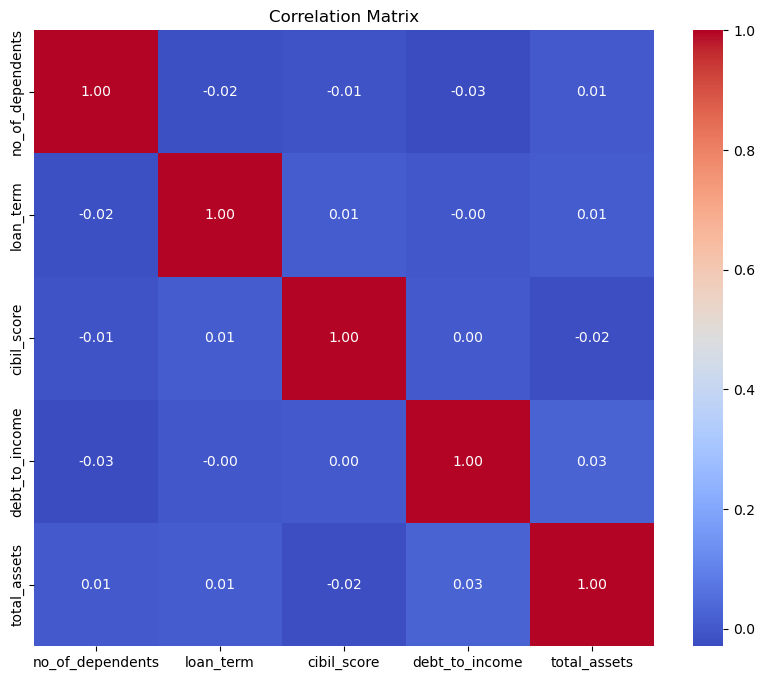

In [20]:
# Compute the correlation matrix
correlation_matrix = X[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

*Checking for multicollinearity*

In [21]:
X_vif = X[numerical_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

            Feature        VIF
0  no_of_dependents   2.984701
1         loan_term   4.287814
2       cibil_score   9.704028
3    debt_to_income  12.218031
4      total_assets   3.585178


In [22]:
X.head(5)

,no_of_dependents,education,self_employed,loan_term,cibil_score,debt_to_income,total_assets
0,2,Graduate,No,12,778,3.114583,50700000
1,0,Not Graduate,Yes,8,417,2.975610,17000000
2,3,Graduate,No,20,506,3.263736,57700000
3,3,Graduate,No,8,467,3.743902,52700000
4,5,Not Graduate,Yes,20,382,2.469388,55000000


## *Model training and exploration*

**Step 1: test all 4 selected models, using their default features:**

*The outcome here is the cross-validation mean F1 score of all 4 models, with their default parameters on the training data*

In [23]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}



In [24]:
f1_scorer = make_scorer(f1_score, average='macro')


for name, model in models.items():
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=f1_scorer)
    print(f"{name} Mean F1 score (5-fold CV): {np.mean(scores):.2f}")

KNN Mean F1 score (5-fold CV): 0.92
Logistic Regression Mean F1 score (5-fold CV): 0.91
Random Forest Mean F1 score (5-fold CV): 1.00
Neural Network Mean F1 score (5-fold CV): 0.98


**Exploring NN and RF**



In [25]:
# Random Forest parameters and search:

param_distributions_rf = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions_rf,
    n_iter=20,  # Number of random combinations to test
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Fit Random Forest model
random_search_rf.fit(X_train_preprocessed, y_train)
best_rf = random_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")





Best Parameters for Random Forest: {'n_estimators': 125, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}


In [26]:
param_distributions_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100)],
    'activation': ['tanh', 'relu'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01, 0.1], # Regularization term
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.0001],

}

random_search_nn = RandomizedSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_distributions=param_distributions_nn,
    n_iter=20,  # Number of random combinations to test
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Fit Neural Network model
random_search_nn.fit(X_train_preprocessed, y_train)
best_nn = random_search_nn.best_estimator_
print(f"Best Parameters for Neural Network: {random_search_nn.best_params_}")

Best Parameters for Neural Network: {'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'tanh'}


In [27]:
# Evaluate Random Forest
# ---------------------------
# Cross-validation predictions
y_pred_rf = cross_val_predict(best_rf, X_train_preprocessed, y_train, cv=5)

# Classification report and accuracy
print("\nClassification Report for Random Forest (Cross-Validation):")
print(classification_report(y_train, y_pred_rf))
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print(f"Accuracy for Random Forest (Cross-Validation): {accuracy_rf:.4f}")

# Confusion Matrix
print("\nConfusion Matrix for Random Forest (Cross-Validation):")
print(confusion_matrix(y_train, y_pred_rf))



Classification Report for Random Forest (Cross-Validation):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2120
           1       1.00      0.99      0.99      1295

    accuracy                           1.00      3415
   macro avg       1.00      0.99      1.00      3415
weighted avg       1.00      1.00      1.00      3415

Accuracy for Random Forest (Cross-Validation): 0.9956

Confusion Matrix for Random Forest (Cross-Validation):
[[2120    0]
 [  15 1280]]


In [28]:
# Evaluate Neural Network

# Cross-validation predictions
y_pred_nn = cross_val_predict(best_nn, X_train_preprocessed, y_train, cv=5)

# Classification report and accuracy
print("\nClassification Report for Neural Network (Cross-Validation):")
print(classification_report(y_train, y_pred_nn))
accuracy_nn = accuracy_score(y_train, y_pred_nn)
print(f"Accuracy for Neural Network (Cross-Validation): {accuracy_nn:.4f}")

# Confusion Matrix
print("\nConfusion Matrix for Neural Network (Cross-Validation):")
print(confusion_matrix(y_train, y_pred_nn))


Classification Report for Neural Network (Cross-Validation):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2120
           1       0.99      0.98      0.98      1295

    accuracy                           0.99      3415
   macro avg       0.99      0.98      0.98      3415
weighted avg       0.99      0.99      0.99      3415

Accuracy for Neural Network (Cross-Validation): 0.9851

Confusion Matrix for Neural Network (Cross-Validation):
[[2101   19]
 [  32 1263]]


**Optimized random forest on test data:**

In [29]:
best_rf = random_search_rf.best_estimator_

In [30]:
y_test_pred = best_rf.predict(X_test_preprocessed)

# Evaluate the model
print("Classification Report for Random Forest on Test Data:")
print(classification_report(y_test, y_test_pred))

print("Accuracy on Test Data:")
print(f"{accuracy_score(y_test, y_test_pred):.4f}")

print("Confusion Matrix for Random Forest on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

Accuracy on Test Data:
0.9988
Confusion Matrix for Random Forest on Test Data:
[[536   0]
 [  1 317]]


**Feature importance**

In [31]:

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get the important features and their importance scores
important_features = [
    (feature_names[i], importance)
    for i, importance in enumerate(best_rf.feature_importances_)
    if importance > 0
]

# Sort by importance
important_features_sorted = sorted(important_features, key=lambda x: x[1], reverse=True)

# Display important features with their importance scores
print("Feature Importances:")
for feature, importance in important_features_sorted:
    print(f"{feature}: {importance:.4f}")



Feature Importances:
num__cibil_score: 0.8387
num__loan_term: 0.0793
num__debt_to_income: 0.0552
num__total_assets: 0.0185
num__no_of_dependents: 0.0049
cat__self_employed_ No: 0.0010
cat__education_ Not Graduate: 0.0009
cat__self_employed_ Yes: 0.0008
cat__education_ Graduate: 0.0007


**Ignore below, we was looking at if there was a way we could do some like risk analysis and see if there are things we could look at later for how close the loan is to be rejected and if we should charge a higher interest rate for that**


In [40]:
# Map probabilities to a 1–100 scale
risk_scores = np.ceil(not_approved_prob * 100).astype(int)

# Combine into a DataFrame
risk_scores_df = pd.DataFrame({
    'Risk_Score': risk_scores,
    'Not_Approved_Probability': not_approved_prob
})

# Sort by Risk Score (ascending)
sorted_risk_scores = risk_scores_df.sort_values(by='Risk_Score', ascending=True)

# Print sorted risk scores
print(sorted_risk_scores)




     Risk_Score  Not_Approved_Probability
842           0                  0.000000
20            0                  0.000000
574           0                  0.000000
16            0                  0.000000
685           0                  0.000000
..          ...                       ...
29          100                  0.993200
19          100                  0.992000
852         100                  0.992000
2           100                  0.992000
0           100                  0.999111

[854 rows x 2 columns]


## **THANK YOU AND HAPPY HOLIDAYS!!!!**